# Explore here

In [1]:
import os

from dotenv import load_dotenv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
# Cargar variables del archivo .env
load_dotenv()

# Obtener las credenciales
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

In [3]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [4]:
artist_id = "6qqNVTkY8uBg9cP3Jd7DAH"
artist_name = spotify.artist(artist_id)['name']
top_tracks = spotify.artist_top_tracks(artist_id)['tracks']

df_tracks = pd.DataFrame(top_tracks)
df_tracks = df_tracks[['name', 'popularity', 'duration_ms']]
df_tracks['duration_min'] = df_tracks['duration_ms'] / 60000
df_tracks = df_tracks.drop(columns=['duration_ms'])

In [5]:
df_tracks = df_tracks.sort_values(by='popularity', ascending=False)
display(df_tracks.head(3))

,name,popularity,duration_min
0,BIRDS OF A FEATHER,99,3.506217
1,WILDFLOWER,96,4.357767
2,CHIHIRO,91,5.057333


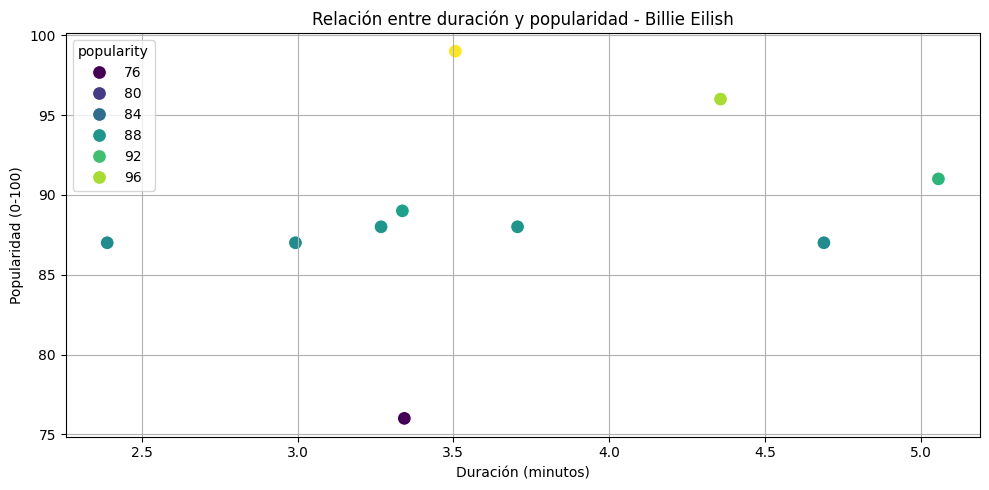

In [6]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df_tracks, 
    x='duration_min', 
    y='popularity', 
    hue='popularity', 
    palette='viridis', 
    s=100)

plt.title(f'Relación entre duración y popularidad - {artist_name}')
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad (0-100)')
plt.grid(True)
plt.tight_layout()
plt.show()